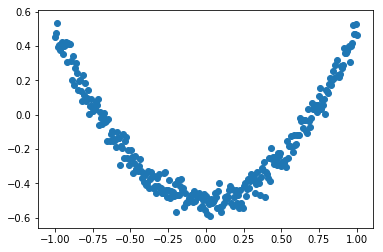

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 神经层的函数
def add_layer(inputs,in_size,out_size,activation_function=None):
    Weights=tf.Variable(tf.random_normal([in_size,out_size]))
    biases=tf.Variable(tf.zeros([1,out_size])+0.1)
    Wx_plus_b=tf.matmul(inputs,Weights)+biases
    if activation_function is None:
        outputs=Wx_plus_b
    else:
        outputs=activation_function(Wx_plus_b)
    return outputs

# 导入数据
x_data=np.linspace(-1,1,300,dtype=np.float32)[:,np.newaxis]
noise=np.random.normal(0,0.05,x_data.shape).astype(np.float32)
y_data=np.square(x_data)-0.5+noise

xs=tf.placeholder(tf.float32,[None,1])
ys=tf.placeholder(tf.float32,[None,1])

# 搭建网络
l1=add_layer(xs,1,10,activation_function=tf.nn.relu)
predication=add_layer(l1,10,1,activation_function=None)
loss=tf.reduce_mean(tf.reduce_sum(tf.square(ys-predication),
                                 reduction_indices=[1]))

train_step=tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# 初始化变量
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

# 用散点图描述真实数据
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.scatter(x_data,y_data)
plt.ion() #用于连续显示
plt.show()

# 训练
for i in range(1000):
    sess.run(train_step,feed_dict={xs:x_data,ys:y_data})
    if i % 50 ==0:
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        predication_value=sess.run(predication,feed_dict={xs:x_data})
        lines=ax.plot(x_data,predication_value,'r-',lw=5)
        plt.pause(0.1)
#         print(sess.run(loss,feed_dict={xs:x_data,ys:y_data}))


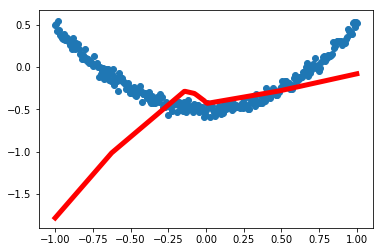

In [31]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 神经层的函数
def add_layer(inputs,in_size,out_size,activation_function=None):
    Weights=tf.Variable(tf.random_normal([in_size,out_size]))
    biases=tf.Variable(tf.zeros([1,out_size])+0.1)
    Wx_plus_b=tf.matmul(inputs,Weights)+biases
    if activation_function is None:
        outputs=Wx_plus_b
    else:
        outputs=activation_function(Wx_plus_b)
    return outputs

# 导入数据
x_data=np.linspace(-1,1,300,dtype=np.float32)[:,np.newaxis]
noise=np.random.normal(0,0.05,x_data.shape).astype(np.float32)
y_data=np.square(x_data)-0.5+noise

xs=tf.placeholder(tf.float32,[None,1])
ys=tf.placeholder(tf.float32,[None,1])

# 搭建网络
l1=add_layer(xs,1,10,activation_function=tf.nn.relu)
predication=add_layer(l1,10,1,activation_function=None)
loss=tf.reduce_mean(tf.reduce_sum(tf.square(ys-predication),
                                 reduction_indices=[1]))

train_step=tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# 初始化变量
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

# 用散点图描述真实数据
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.scatter(x_data,y_data)
plt.ion() #用于连续显示


# 训练
for i in range(1000):
    sess.run(train_step,feed_dict={xs:x_data,ys:y_data})
    if i % 50 ==0:
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        predication_value=sess.run(predication,feed_dict={xs:x_data})
        lines=ax.plot(x_data,predication_value,'r-',lw=5)
        plt.pause(0.1)
#         print(sess.run(loss,feed_dict={xs:x_data,ys:y_data}))
